In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

Text(0, 0.5, 'Upvote')

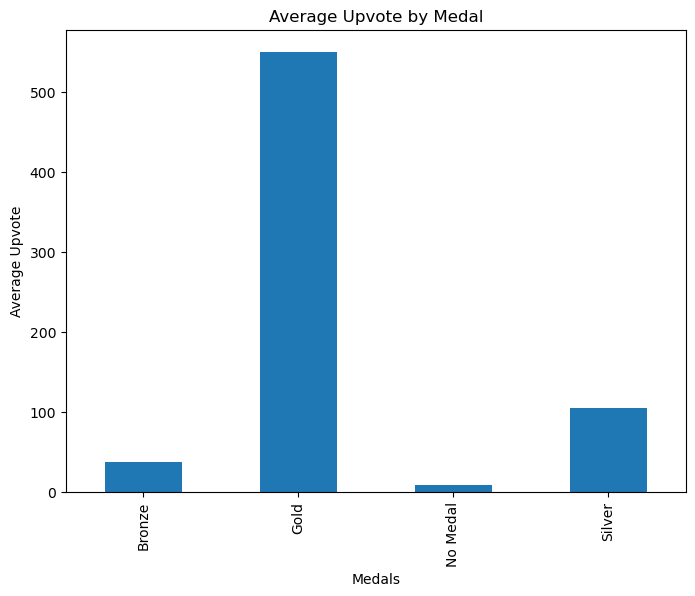

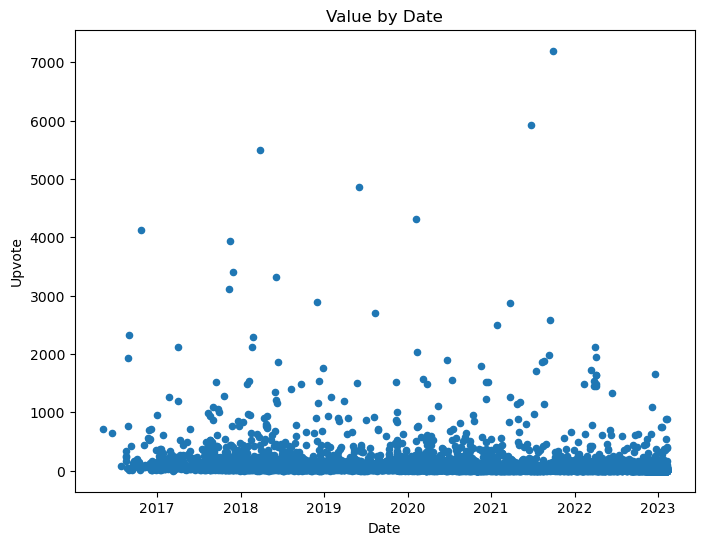

In [2]:
# Load dataset data
df = pd.read_csv('./output_data/df_data_cleaned.csv')

# Create bar chart of average value by category
category_mean = df.groupby('Medals')['Upvotes'].mean()
category_mean.plot(kind='bar', figsize=(8, 6))
plt.title('Average Upvote by Medal')
plt.xlabel('Medals')
plt.ylabel('Average Upvote')

# Create scatter plot of value by date
df['Date'] = pd.to_datetime(df['Date'])
df.plot(x='Date', y='Upvotes', kind='scatter', figsize=(8, 6))
plt.title('Value by Date')
plt.xlabel('Date')
plt.ylabel('Upvote')


In [3]:
# Create dropdown menu to select category
category_dropdown = widgets.Dropdown(
    options=list(df['Medals'].unique()),
    value='Gold',
    description='Select Category:'
)

# Create checkbox to show/hide scatter plot
scatter_checkbox = widgets.Checkbox(
    value=True,
    description='Show Scatter Plot'
)

# Create slider to filter data by value
value_slider = widgets.FloatSlider(
    min=0, max=100, step=1, value=50,
    description='Filter by upvote:'
)


In [4]:
def update_plots(category, show_scatter, value_filter):
    # Filter data by category and value
    filtered_data = df[df['Medals'] == category]
    filtered_data = filtered_data[filtered_data['Upvotes'] >= value_filter]

    # Update bar chart
    category_mean = filtered_data.groupby('Medals')['Upvotes'].mean()
    plt.subplot(1, 2, 1)
    plt.cla()
    category_mean.plot(kind='bar', figsize=(8, 6))
    plt.title('Average Value by Category')
    plt.xlabel('Medals')
    plt.ylabel('Average Upvote')

    # Update scatter plot
    if show_scatter:
        plt.subplot(1, 2, 2)
        plt.cla()
        filtered_data.plot(x='Date', y='Upvotes', kind='scatter', figsize=(8, 6))
        plt.title('Value by Date')
        plt.xlabel('Date')
        plt.ylabel('Upvotes')
    else:
        plt.subplot(1, 2, 2)
        plt.cla()


In [5]:
# Display widgets and initial plots
display(widgets.VBox([category_dropdown, value_slider, scatter_checkbox]))
plt.show()

# Connect widgets to update function
widgets.interactive_output(update_plots, {'category': category_dropdown,
                                          'show_scatter': scatter_checkbox,
                                          'value_filter': value_slider})


Output()